In [0]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2
import cv2
import numpy as np

In [0]:
leftImage= cv2.imread("scene_l.pgm")
rightImage= cv2.imread("scene_r.pgm")
leftImage2= cv2.imread("tree_l.pgm")
rightImage2= cv2.imread("tree_r.pgm")
leftImage = cv2.cvtColor(leftImage,cv2.COLOR_BGR2GRAY)
rightImage = cv2.cvtColor(rightImage,cv2.COLOR_BGR2GRAY)
leftImage2 = cv2.cvtColor(leftImage2,cv2.COLOR_BGR2GRAY)
rightImage2 = cv2.cvtColor(rightImage2,cv2.COLOR_BGR2GRAY)

print(leftImage.shape)
print(leftImage2.shape)

def stereo_DP(leftImage, rightImage):
  rowLen = leftImage.shape[0]
  colLen = leftImage.shape[1]
  noise= 2
  c0=1
  disparity_Map_Left = np.zeros([rowLen, colLen], dtype=np.float)
  disparity_Map_Right = np.zeros([rowLen, colLen], dtype=np.float)
  costMatrix = np.zeros([colLen, colLen], dtype=np.float)
  pos = np.zeros([colLen, colLen], dtype=np.float) #to know which pixel is skipped

  for row in range(0,rowLen):


      for i in range(0,rowLen):
        costMatrix[i,0] = i*c0
      
      for j in range(0,colLen):
        costMatrix[0,j] = j*c0
      
      for i in range(0, colLen):
              for j in range(0, colLen):

                  # Cost function for matching features in the left and right images
                  cost = ((abs(leftImage[row, i] - rightImage[row, j]))**2)/pow(noise,2)
                  
                  min1 = costMatrix[i-1, j-1] + cost
                  min2 = costMatrix[i-1, j] + c0
                  min3 = costMatrix[i, j-1] + c0
          
                  cmin = min(min1, min2, min3)

                  costMatrix[i, j] = cmin
                  
                  # Forming path matrix
                  if(cmin == min1):
                      pos[i, j] = 1
                  elif(cmin == min2):
                      pos[i, j] = 2
                  else:
                      pos[i, j] = 3
    
      while(i != 0 and j !=0):
              
              # if feature in left and right image matches
              if(pos[i, j] == 1):
                disparity_Map_Left[row,i] = abs(i-j)
                disparity_Map_Right[row,j] = abs(j-i) 
                i = i-1
                j = j-1
              elif(pos[i, j] == 2):
                #left pixel skipped
                disparity_Map_Left[row,i] = 	float('nan')
                i = i-1
          
              elif(pos[i, j] == 3):
                #right pixel skipped
                disparity_Map_Right[row,j] = float('nan')
                j = j-1
  plt.imshow(disparity_Map_Left, cmap = 'gray')
  plt.show()


(288, 384)
(233, 256)


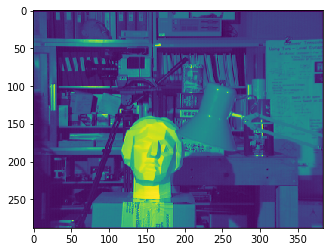

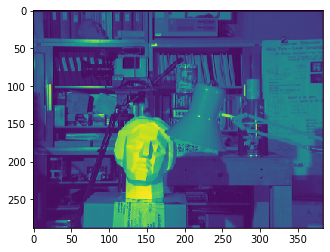

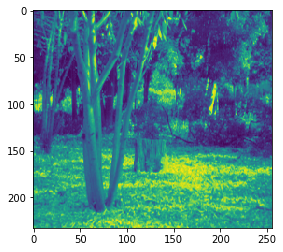

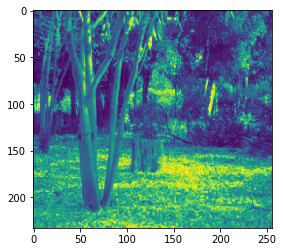

In [0]:
plt.imshow(leftImage)
plt.show()
plt.imshow(rightImage)
plt.show()
plt.imshow(leftImage2)
plt.show()
plt.imshow(rightImage2)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in ubyte_scalars


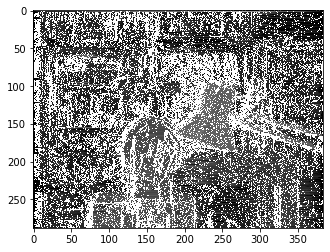

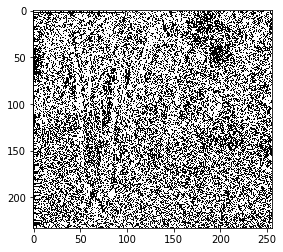

In [0]:
stereo_DP(leftImage, rightImage)
stereo_DP(leftImage2, rightImage2)